<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
!pip install html5lib

In [3]:
import pandas as pd

Download the webpage at the url


In [4]:
#your code goes here

# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text 


Create a soup object


In [5]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

Scrape the `Language name` and `annual average salary`.


In [6]:
#your code goes here
table = soup.find('table')
dict = {"Language":[],
       "Average Annual Salary":[]}
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    lang_name = cols[1].getText() # store the value in column 3 as color_name
    avg_salary = cols[3].getText() # store the value in column 4 as color_code
    #print("{}--->{}".format(lang_name,avg_salary))
    dict["Language"].append(lang_name)
    dict["Average Annual Salary"].append(avg_salary)
    
dict["Language"].pop(0)
dict["Average Annual Salary"].pop(0)

print(dict)
df = pd.DataFrame(dict)
df

{'Language': ['Python', 'Java', 'R', 'Javascript', 'Swift', 'C++', 'C#', 'PHP', 'SQL', 'Go'], 'Average Annual Salary': ['$114,383', '$101,013', '$92,037', '$110,981', '$130,801', '$113,865', '$88,726', '$84,727', '$84,793', '$94,082']}


,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


Save the scrapped data into a file named *popular-languages.csv*


In [7]:
# your code goes here
df.to_csv('popular-languages.csv')

In [32]:
#Plotting chart
#type(df['Average Annual Salary'])
#df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '',regex=False)
#df['Average Annual Salary'] = df['Average Annual Salary'].str.replace(',', '',regex=False)
#df


<Axes: xlabel='Language'>

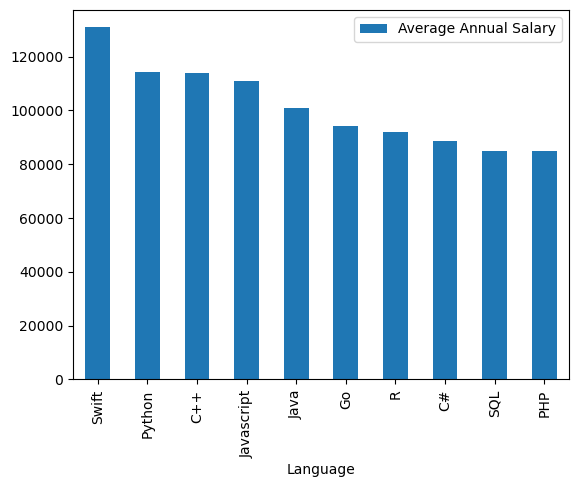

In [31]:
df
df['Average Annual Salary'] = pd.to_numeric(df['Average Annual Salary'])
df.sort_values(by='Average Annual Salary', ascending=False).plot.bar(x='Language',y='Average Annual Salary')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
